In [3]:
## Import data

data <- read.csv('NFL_Internal_data.csv')
head(data)

,Date,Name,RPE,Sleep.Quality,Sleep.Duration,Fatigue,Soreness,Stress,Readiness.Score
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2023-07-25,Nick Bellore,8.0,5,4.5,8.0,6.5,8,88.0
2,2023-07-10,Jamal Adams,7.0,5,7.0,6.5,8.0,8,86.0
3,2023-07-25,Holton Ahlers,7.0,5,5.0,6.0,5.0,7,84.0
4,2023-07-13,Joey Blount,5.5,5,8.0,7.5,6.0,6,79.5
5,2023-07-13,Lance Boykin,6.5,5,4.5,6.0,7.0,6,85.0
6,2023-07-10,Lance Boykin,8.5,5,8.0,4.5,8.0,6,84.5


In [70]:
## Inspect structure and summary statistics of the data

str(data)
summary(data)

'data.frame':	184 obs. of  9 variables:
 $ Date           : Date, format: "2023-07-25" "2023-07-10" ...
 $ Name           : chr  "Nick Bellore" "Jamal Adams" "Holton Ahlers" "Joey Blount" ...
 $ RPE            : num  8 7 7 5.5 6.5 8.5 6.5 8 8.5 5 ...
 $ Sleep.Quality  : num  5 5 5 5 5 5 5 5 5 5 ...
 $ Sleep.Duration : num  4.5 7 5 8 4.5 8 4.5 5.5 6 4.5 ...
 $ Fatigue        : num  8 6.5 6 7.5 6 4.5 7 5.5 8 4.5 ...
 $ Soreness       : num  6.5 8 5 6 7 8 4.5 8 7 7 ...
 $ Stress         : int  8 8 7 6 6 6 5 5 4 4 ...
 $ Readiness.Score: num  88 86 84 79.5 85 84.5 81.5 85.5 83.5 81.5 ...


      Date                Name                RPE        Sleep.Quality  
 Min.   :2023-07-05   Length:184         Min.   :5.000   Min.   :5.000  
 1st Qu.:2023-07-13   Class :character   1st Qu.:6.000   1st Qu.:6.000  
 Median :2023-07-24   Mode  :character   Median :6.500   Median :7.000  
 Mean   :2023-07-23                      Mean   :6.386   Mean   :6.894  
 3rd Qu.:2023-08-03                      3rd Qu.:7.000   3rd Qu.:8.000  
 Max.   :2023-08-11                      Max.   :9.000   Max.   :9.000  
 Sleep.Duration     Fatigue         Soreness         Stress     
 Min.   :4.500   Min.   :3.500   Min.   :4.000   Min.   :4.000  
 1st Qu.:6.000   1st Qu.:4.500   1st Qu.:5.000   1st Qu.:5.000  
 Median :7.000   Median :6.000   Median :6.250   Median :6.000  
 Mean   :6.891   Mean   :5.938   Mean   :6.152   Mean   :5.875  
 3rd Qu.:8.000   3rd Qu.:7.500   3rd Qu.:7.500   3rd Qu.:7.000  
 Max.   :9.000   Max.   :8.000   Max.   :8.500   Max.   :8.000  
 Readiness.Score
 Min.   :72.00  


In [6]:
## Which players had the highest average readiness scores?

library(tidyverse)
data  %>% 
  group_by(Name)  %>% 
  summarize(mean_of_readiness_score = mean(Readiness.Score))  %>% 
  arrange(desc(mean_of_readiness_score))

Name,mean_of_readiness_score
<chr>,<dbl>
Jake Bobo,80.73913
Jamal Adams,80.15217
Lance Boykin,79.84783
Holton Ahlers,79.67391
Joey Blount,79.41304
Myles Adams,79.39130
MJ Anderson,78.97826
Nick Bellore,78.82609


In [7]:
## Was there a correlation between sleep duration and readiness?

cor.test(data$Readiness.Score, data$Sleep.Duration)


	Pearson's product-moment correlation

data:  data$Readiness.Score and data$Sleep.Duration
t = -10.064, df = 182, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6834861 -0.4962069
sample estimates:
       cor 
-0.5979463 


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


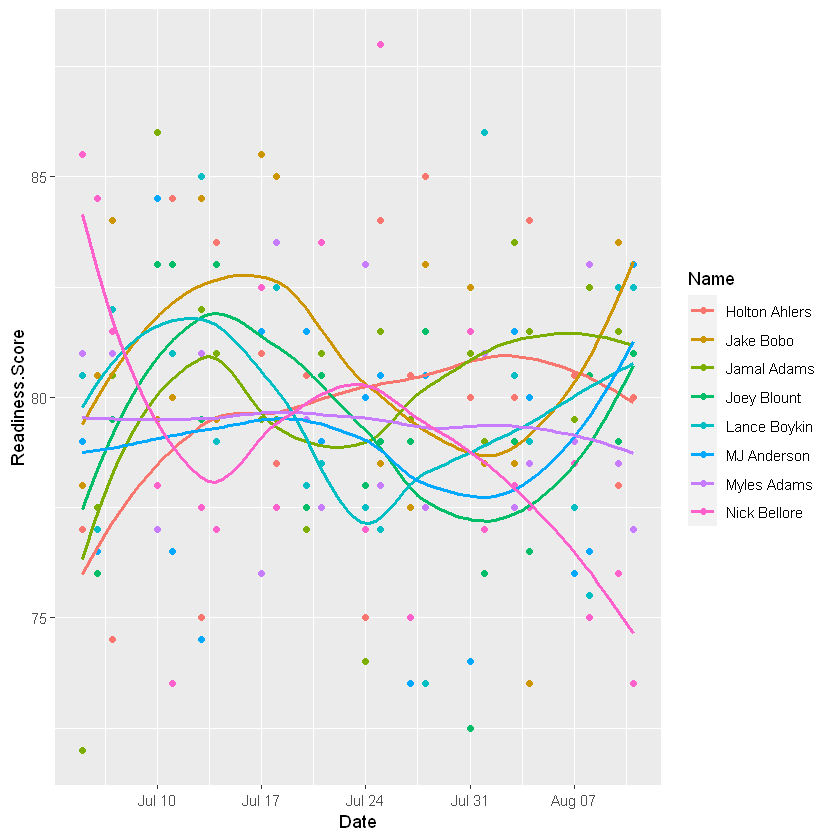

In [10]:
## Did readiness scores change over the course of the season?
library(ggplot2)
data$Date <- as.Date(data$Date, "%Y-%m-%d")
ggplot(data, aes(x = Date, y = Readiness.Score, color = Name)) +
  geom_point() +
  geom_smooth(se = F)

In [11]:
## Who had the most variation in daily readiness scores?
## The variance in each player's scores shows who had the most fluctuation.

data %>%
  group_by(Name) %>%
  summarize(score_var = var(Readiness.Score)) %>%
  arrange(desc(score_var))

Name,score_var
<chr>,<dbl>
Nick Bellore,14.763834
Holton Ahlers,10.582016
Lance Boykin,9.668972
Jamal Adams,8.873518
Jake Bobo,8.815217
MJ Anderson,8.351779
Joey Blount,7.401186
Myles Adams,4.521739


In [47]:
as.data.frame(coefficients(summary(m)))['Pr(>|t|)']

Warning message in summary.lm(m):
"essentially perfect fit: summary may be unreliable"


,Pr(>|t|)
,<dbl>
(Intercept),0.0000000
Date,0.8153284
RPE,0.0000000
Sleep.Quality,0.0000000
Sleep.Duration,0.0000000
Fatigue,0.2035412
Soreness,0.0000000
Stress,0.0000000


In [53]:
## What factors were most predictive of readiness score?
# Fit multiple regression model
data_no_name_date <- data %>%  
  select(-Name,-Date)
m <- lm(Readiness.Score ~ ., data = data_no_name_date )

# View summary of model
summary(m)

# Identify signicoef(summary(m)) %>% 
coef(summary(m)) %>%
  as.data.frame() %>%
  .['Pr(>|t|)']

# Check variance inflation factors
car::vif(m)

# Try model with only significant predictors 
m2 <- lm(Readiness.Score ~ Sleep.Quality + Fatigue + Soreness, data = data_no_name_date)
summary(m2)

# Compare model performance
broom::glance(m)
broom::glance(m2)

Warning message in summary.lm(m):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = Readiness.Score ~ ., data = data_no_name_date)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.307e-13 -6.070e-15  3.380e-15  1.200e-14  3.358e-14 

Coefficients:
                 Estimate Std. Error    t value Pr(>|t|)    
(Intercept)     7.500e+01  4.706e-14  1.594e+15   <2e-16 ***
RPE             1.000e+00  3.880e-15  2.577e+14   <2e-16 ***
Sleep.Quality  -1.000e+00  6.305e-15 -1.586e+14   <2e-16 ***
Sleep.Duration -1.000e+00  6.102e-15 -1.639e+14   <2e-16 ***
Fatigue        -3.267e-15  2.525e-15 -1.294e+00    0.197    
Soreness        1.000e+00  2.577e-15  3.880e+14   <2e-16 ***
Stress          1.000e+00  2.646e-15  3.780e+14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.941e-14 on 177 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.139e+29 on 6 and 177 DF,  p-value: < 2.2e-16


Warning message in summary.lm(m):
"essentially perfect fit: summary may be unreliable"


,Pr(>|t|)
,<dbl>
(Intercept),0.0000000
RPE,0.0000000
Sleep.Quality,0.0000000
Sleep.Duration,0.0000000
Fatigue,0.1974058
Soreness,0.0000000
Stress,0.0000000


Warning message in summary.lm(object, ...):
"essentially perfect fit: summary may be unreliable"


RPE  Sleep.Quality Sleep.Duration        Fatigue       Soreness 
      1.067818       2.576059       2.545018       1.053820       1.042716 
        Stress 
      1.021223


Call:
lm(formula = Readiness.Score ~ Sleep.Quality + Fatigue + Soreness, 
    data = data_no_name_date)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8099 -1.3035 -0.2074  1.2843  4.2584 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   86.83508    1.36112  63.797   <2e-16 ***
Sleep.Quality -1.99499    0.14605 -13.660   <2e-16 ***
Fatigue        0.03833    0.09218   0.416    0.678    
Soreness       1.02704    0.09453  10.865   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.834 on 180 degrees of freedom
Multiple R-squared:  0.6372,	Adjusted R-squared:  0.6312 
F-statistic: 105.4 on 3 and 180 DF,  p-value: < 2.2e-16


Warning message in summary.lm(x):
"essentially perfect fit: summary may be unreliable"
Warning message in summary.lm(x):
"essentially perfect fit: summary may be unreliable"


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,4.940621e-14,1.13906e+29,0,6,5380.004,-10744.01,-10718.29,4.320523e-25,177,184


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.6372236,0.6311774,1.833638,105.3912,2.006247e-39,3,-370.6222,751.2444,767.3191,605.2012,180,184


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


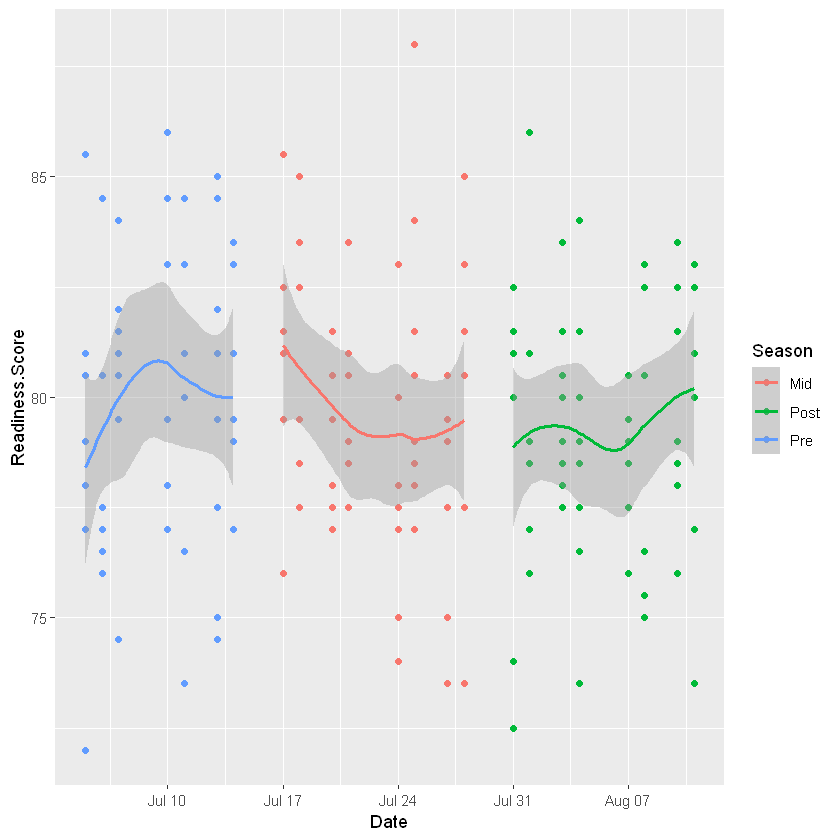

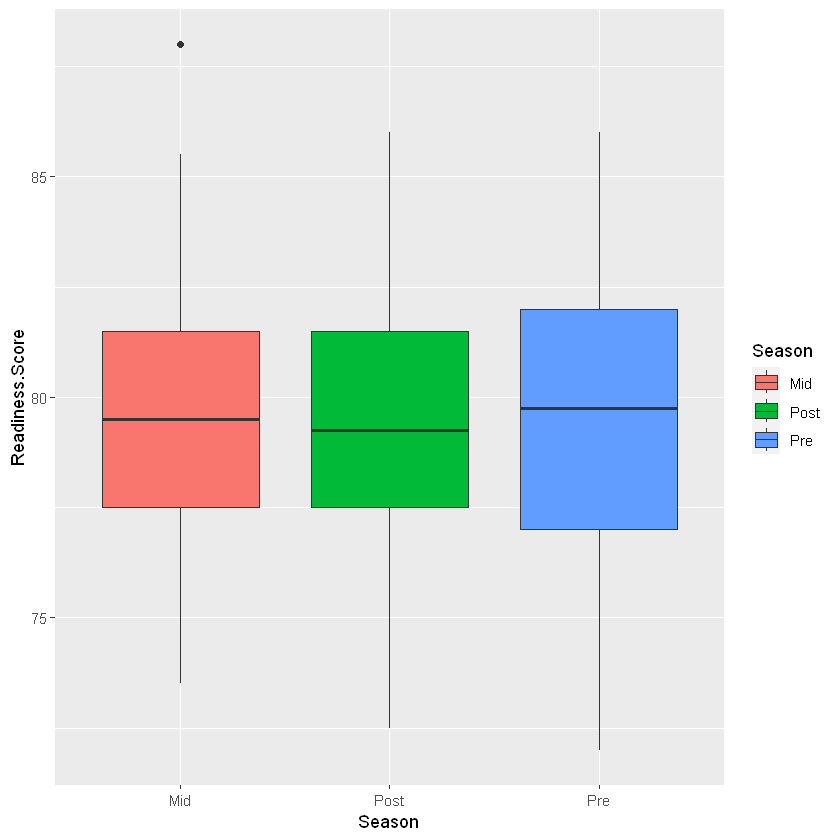

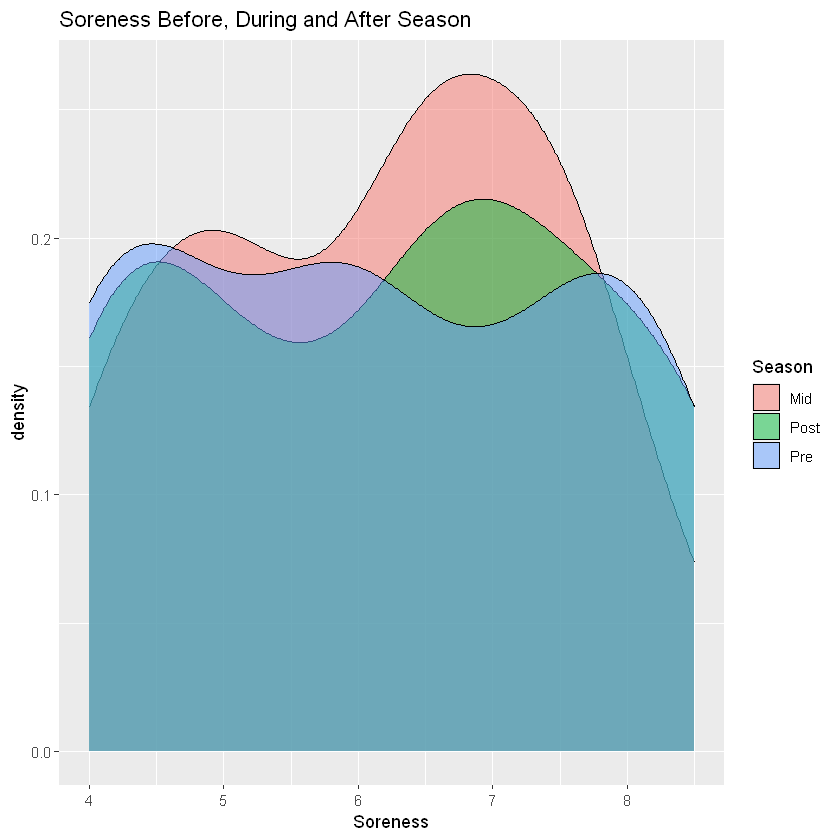

In [69]:
## compare readiness scores before, During and after the start of the season using visualizations
## Create pre/mid/post season factor
# Create date breaks

start <- as.Date("2023-07-05")
end <- as.Date("2023-08-11")

pre_end <- start + (end - start)/3
mid_end <- pre_end + (end - start)/3

# Create factor
df <- data %>% 
  mutate(Season = case_when(
    Date < pre_end ~ "Pre",
    between(Date, pre_end, mid_end) ~ "Mid",
    Date > mid_end ~ "Post"
  ))

# Plot readiness over season
ggplot(df, aes(Date, Readiness.Score, color = Season)) +
  geom_point() +
  geom_smooth()

# Boxplot of readiness 
ggplot(df, aes(x = Season, y = Readiness.Score, fill = Season)) + 
  geom_boxplot()

# Distribution of soreness
ggplot(df, aes(x = Soreness, fill = Season)) +
  geom_density(alpha = 0.5) +
  labs(title = "Soreness Before, During and After Season")